# Hypothese toetsen
Om een goede uitspraak te kunnen doen over data, willen we onderscheid maken tussen:

- een écht effect (bijvoorbeeld: vrouwen zetten gemiddeld meer stappen dan mannen), en

- toeval (in een steekproef kan er altijd “ruis” zitten).

Het proces waarbij we met statistiek bepalen of een gevonden verschil waarschijnlijk echt is (en niet puur toeval), heet hypothesetoetsing.

In dit document begeleiden we jullie stap voor stap door het proces.
## Casus
De TU Delft wil de fysieke activiteit van haar studenten stimuleren. Om een gerichte aanpak op te zetten, wil het bestuur weten of er een verschil is tussen de fysieke activiteit van mannelijke en vrouwelijke studenten.

Het vermoeden is namelijk dat vrouwen doorgaans fysiek actiever zijn dan mannen, en dat de interventies dus vooral gericht moeten zijn op het activeren van mannen. Om deze vraag te beantwoorden hebben jullie de enquête uitgevoerd, dit is onze steekproef voor een 'doorsnee' populatie TU Delft studenten. Om deze vraag te beantwoorden en netjes hierover te rapporteren hebben we een hypothese opgesteld die als volgt luidt:

>  *"Vrouwelijke studenten aan de TU Delft zetten gemiddeld meer stappen per week dan mannelijke studenten aan de TU Delft."*


# 1. Data inladen
Allereerst beginnen we met het inladen van de data.


## 1.1. Data inladen

Als het goed is hebben jullie ondertussen al veel geleerd hoe je data moet inladen en verwerken. Laten we beginnen met het inladen van de data. Deze is opgeslagen op GitHub. De eerste paar regel laadt deze in voor jullie.

Controleer of de data ingeladen is en of het goed overgenomen is.

In [ ]:
# Load it into R
df <- read.csv("https://raw.githubusercontent.com/DannyLemmers/Stappenteller-2025/main/data/StappentellerData.csv")

# Controleer of het gelukt is:
head(df)
# Overzicht van de kolomnamen.
names(df)

,Geslacht,BMI,Woon,StapEst,ErvFASub1.Q.,ErvFASub2.Q.,ErvFA,DagZwa1,TijdZwa1.Uur.,TijdZwa1.Min.,⋯,TijdZwa2.Min.,DagMat2,TijdMat2.Uur.,TijdMat2.Min.,DagWan2,TijdWan2.Uur.,TijdWan2.Min.,IPAQTOT2,TijdZit2.Uur.,TijdZit2.Min.
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Man,19.6,Uitwonend,5500,7,7,7.0,6,1,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Man,21.5,Thuiswonend,6000,5,5,5.0,4,1,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Man,25.3,Thuiswonend,NA,5,4,4.5,4,2,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Vrouw,25.0,Thuiswonend,2500,4,4,4.0,2,1,40,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,,22.0,Uitwonend,7000,6,5,5.5,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Man,21.5,Thuiswonend,4000,3,2,2.5,3,0,45,⋯,0,2,0,30,7,0,15,1546.5,7,0


[1] "Geslacht"      "BMI"           "Woon"          "StapEst"      
 [5] "ErvFASub1.Q."  "ErvFASub2.Q."  "ErvFA"         "DagZwa1"      
 [9] "TijdZwa1.Uur." "TijdZwa1.Min." "DagMat1"       "TijdMat1.Uur."
[13] "TijdMat1.Min." "DagWan1"       "TijdWan1.Uur." "TijdWan1.Min."
[17] "IPAQTOT1"      "TijdZit1.Uur." "TijdZit1.Min." "Attitu.1."    
[21] "Attitu.2."     "AttituTot"     "SocOmg.1."     "SocOmg.2."    
[25] "SocOmgTot"     "Systeem"       "StapAantal.1." "StapAantal.2."
[29] "StapAantal.3." "StapAantal.4." "StapAantal.5." "StapAantal.6."
[33] "StapAantal.7." "Comment.1."    "Comment.2."    "Comment.3."   
[37] "Comment.4."    "Comment.5."    "Comment.6."    "Comment.7."   
[41] "DagZwa2"       "TijdZwa2.Uur." "TijdZwa2.Min." "DagMat2"      
[45] "TijdMat2.Uur." "TijdMat2.Min." "DagWan2"       "TijdWan2.Uur."
[49] "TijdWan2.Min." "IPAQTOT2"      "TijdZit2.Uur." "TijdZit2.Min."

## 1.2. Data controle
Nu we de data hebben ingeladen, gaan we eerst controleren of de data goed is. In het echt is data zelden perfect, en ook in de data die jullie verzameld hebben kunnen er fouten zitten. Het opschonen van data hebben jullie in de vorige opdracht(en) al gedaan. Laten we eerst beginnen met geslacht:
- Hoeveel antwoordmogelijkheden zitten er in de data?
- Wat is de verdeling in de data?
- Hoeveel missende waarden bevat de data?

In [ ]:
#Antwoord: Studenten moeten hier zelf mee komen
unique(df$Geslacht)
table(df$Geslacht)
sum(df$Geslacht=="")

[1] "Man"   "Vrouw" ""


        Man Vrouw 
   28    41    43 

[1] 28

Als er blijkt dat er data mist, wat gaan we hiermee doen? Zorg dat je een besluit neemt dat te verdedigen is.

In [ ]:
#Code blok voor eventuele correctie van data
df = df[!(df$Geslacht ==""),]

Nu we de data voor man/vrouw hebben gecontroleerd, kunnen we beginnen met de stappentellerdata. Op dit moment zijn de stappentellerdata per dag, maar we willen deze per week hebben. Vergeet ook niet eventuele missing values (NAs) in de stappen per week op te schonen als dit nog niet gedaan is.

 [1] 41120 55865 69072 56733 61195 39128 67600 40459 36588 49872 36547 51963
[13] 38188 64408 52647 38600 44866 90484 40680 24400 51968 49145 45414 44384
[25] 38003 73026 71833 37311 28244 69741 53198 61581 32627 60732 48397 89393
[37] 63652 31369 84457 38983 39436 46289 28108 51817 38609 75113 51088 70375
[49] 46825 48598 68698 54390 41992 73252 70924 51937 93632 48780 77962 67516
[61] 26123 40167 60217 13291 66001 51743 49767     0 30803


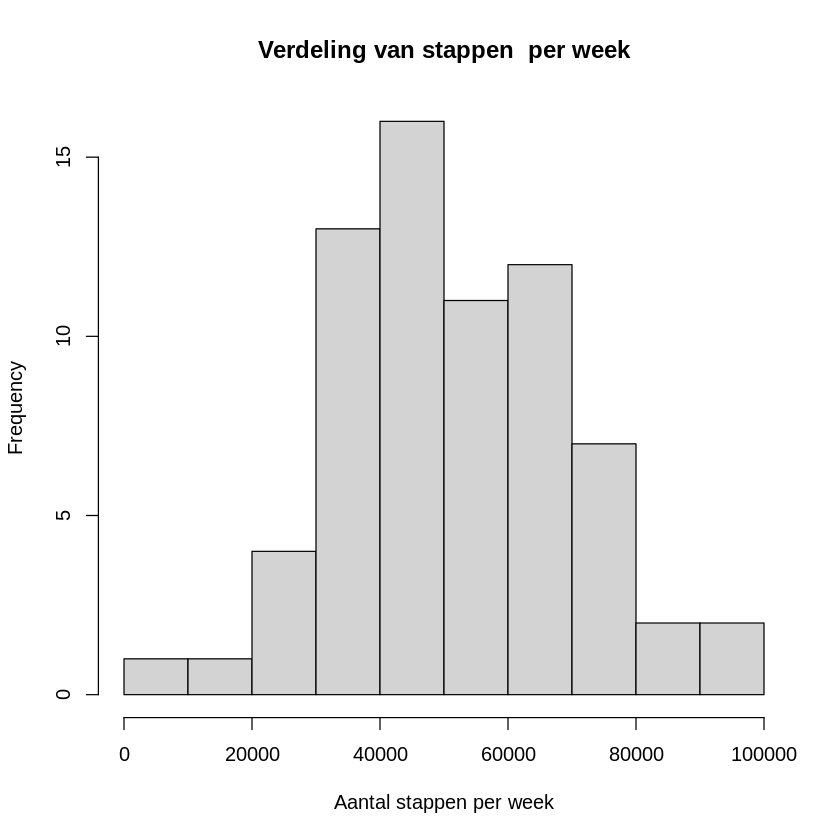

In [ ]:
df$stapWeek = df$StapAantal.1+df$StapAantal.2+df$StapAantal.3+df$StapAantal.4+df$StapAantal.5+df$StapAantal.6+df$StapAantal.7
df = df[!is.na(df$stapWeek),]
options(scipen=5)
hist(df$stapWeek,
     main = "Verdeling van stappen per week",
     xlab = "Aantal stappen per week")


# 2. Beschrijvende statistiek

Voordat we een hypothese gaan toetsen, willen we eerst begrijpen:
- Wat is het gemiddelde aantal stappen per week?
- Hoe groot is de spreiding?
- Ziet de verdeling er normaal uit?

Statistiek begint altijd met **beschrijven**, pas daarna met **toetsen**.



## 2.1. Gemiddelden en standaarddeviaties

We berekenen eerst het gemiddelde en de standaarddeviatie van het aantal stappen per week.

In [ ]:
gemiddelde_stappen <- mean(df$stapWeek)
sd_stappen <- sd(df$stapWeek)
aantal <- length(df$stapWeek)

cat(sprintf("Gemiddelde stappen: %.0f (SD = %.0f, n = %d)\n",
            gemiddelde_stappen,
            sd_stappen,
            aantal))


Gemiddelde stappen: 51555 (SD = 17945, n = 69)


Wat betekenen deze maten?

- Gemiddelde (mean) → het centrale punt van de data
- Standaarddeviatie (sd) → hoe sterk de waarden rond het gemiddelde verspreid zijn

Hoe groter de standaarddeviatie, hoe meer spreiding in het aantal stappen per week.

##2.2. Per geslacht
Omdat onze hypothese gaat over de verschillen tussen mannen en vrouwen, willen we ook de statistieken per groep bekijken.


In [ ]:
mannen  <- df$stapWeek[df$Geslacht == "Man"]
vrouwen <- df$stapWeek[df$Geslacht == "Vrouw"]
gemiddelde_mannen <- mean(mannen)
sd_mannen <- sd(mannen)
aantal_mannen <- length(mannen)

gemiddelde_vrouwen <- mean(vrouwen)
sd_vrouwen <- sd(vrouwen)
aantal_vrouwen <- length(vrouwen)

cat(sprintf("Gemiddelde stappen mannen: %.0f (SD = %.0f, n = %d)\n",
            gemiddelde_mannen,
            sd_mannen,
            aantal_mannen))

cat(sprintf("Gemiddelde stappen vrouwen: %.0f (SD = %.0f, n = %d)\n",
            gemiddelde_vrouwen,
            sd_vrouwen,
            aantal_vrouwen))

Gemiddelde stappen mannen: 54385 (SD = 15742, n = 32)
Gemiddelde stappen vrouwen: 49108 (SD = 19535, n = 37)


##2.3 Uitschieters - Wat zijn uitschieters/outliers?

Een **outlier** is een observatie die duidelijk afwijkt van de rest van de data. Bijvoorbeeld:

- Iemand die 150.000 stappen per week zet
- Of iemand die maar 500 stappen per week heeft

Dat kán echt zijn, maar het kan ook een meetfout of invoerfout zijn. Outliers zijn belangrijk omdat ze:
- Het gemiddelde sterk kunnen beïnvloeden
- De standaarddeviatie vergroten
- De aannames van statistische toetsen kunnen verstoren

Terwijl ze dus mogelijk fout zijn of geen echte informatie over onze populatie bevatten! We willen daarom een methode om outliers te identificeren (en eventueel te verwijderen), maar voordat we dat kunnen moeten we bepalen wanneer iets een outlier is.






### Hoe definiëren we een outlier?
De meest gebruikte definitie in boxplots is gebaseerd op de interkwartielafstand (IQR).

Stap voor stap:

Q1 = 25e percentiel

Q3 = 75e percentiel

IQR = Q3 - Q1

Een waarde wordt als outlier beschouwd als een waarde voldoet aan een van de volgende twee criteria:


> *waarde* < *Q1* - 1.5 x IQR

> *waarde* > *Q3* + 1.5 x IQR

Dit is tevens de standaarddefinitie die boxplots gebruiken. Een boxplot maakt het dus eenvoudig om te zien of er outliers in de data zitten.

##2.4 Boxplot maken
Eerst maken we een boxplot voor de hele groep

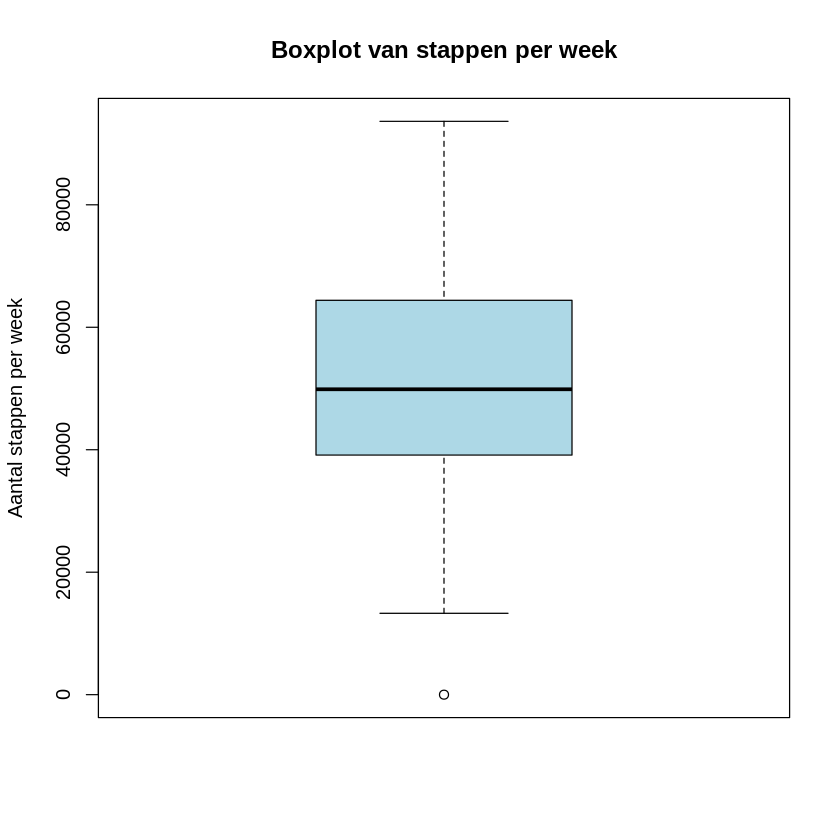

In [ ]:
boxplot(df$stapWeek,
        main = "Boxplot van stappen per week",
        ylab = "Aantal stappen per week",
        col = "lightblue")

Eventuele cirkels buiten de 'snorren' van de boxplot zijn outliers.
- Zijn er in de gehele data outliers aanwezig?
- Is dit een relatlistische outlier, of is dit waarschijnlijk een meetfout?

### Boxplot per geslacht

Omdat onze onderzoeksvraag gaat over verschillen tussen mannen en vrouwen, maken we een boxplot per groep:

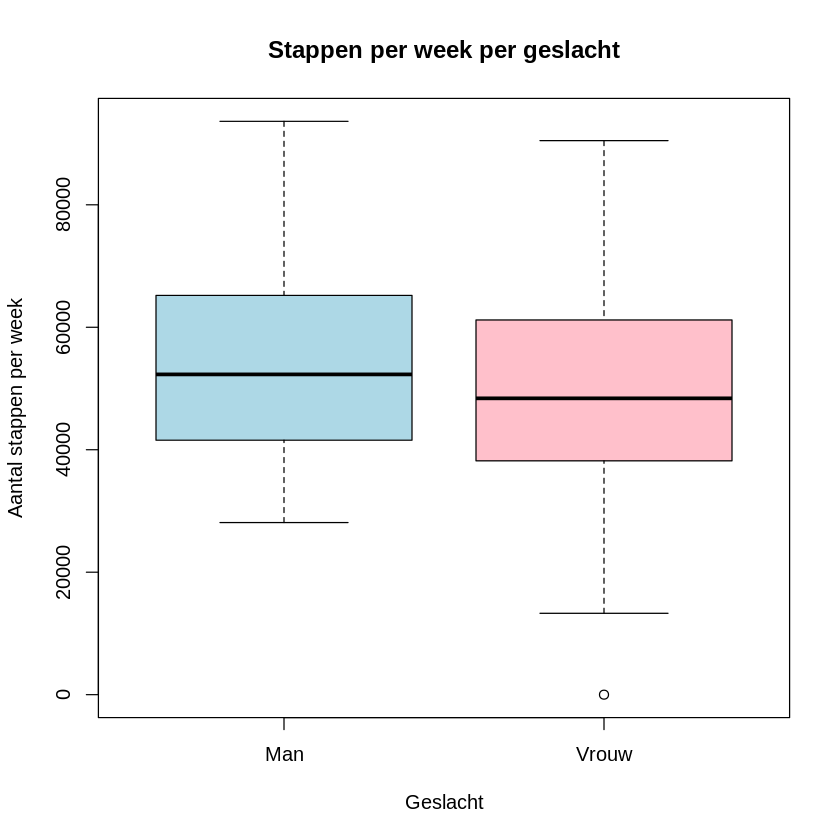

In [ ]:
boxplot(stapWeek ~ Geslacht,
        data = df,
        main = "Stappen per week per geslacht",
        ylab = "Aantal stappen per week",
        col = c("lightblue","pink"))


##2.5 Outlier identificeren en verwijderen

Om eventuele outliers te verwijderen, is het goed om expliciet te berekenen welke waarden buiten de grenzen vallen. We zullen eerst de grenzen moeten bepalen. Daarna kunnen we ze netjes verwijderen en opnieuw controleren.



In [ ]:
Q1  <- quantile(df$stapWeek, 0.25)
Q3  <- quantile(df$stapWeek, 0.75)
IQR_waarde <- Q3 - Q1

ondergrens <- Q1 - 1.5 * IQR_waarde
bovengrens <- Q3 + 1.5 * IQR_waarde

ondergrens
bovengrens

25% 
1208

75% 
102328

### Stap 1: Bepaal de grenzen

### Stap 2: Bekijk welke waarden buiten de grenzen vallen
Zo kunnen we zien welke waarde exact als outlier beschouwd wordt.

In [ ]:
df$stapWeek[df$stapWeek < ondergrens | df$stapWeek > bovengrens]


[1] 0

###Stap 3: Verwijder outliers en controleer opnieuw

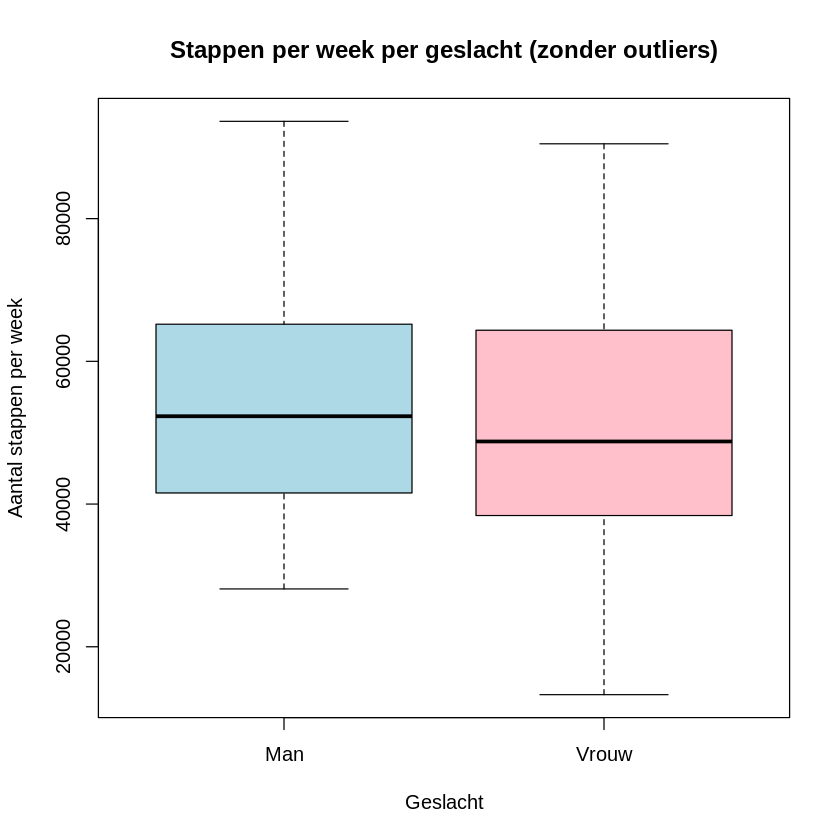

In [ ]:
df <- df[df$stapWeek >= ondergrens & df$stapWeek <= bovengrens, ]

boxplot(stapWeek ~ Geslacht,
        data = df,
        main = "Stappen per week per geslacht (zonder outliers)",
        ylab = "Aantal stappen per week",
        col = c("lightblue","pink"))

#3. Statistische Toetsen
We zijn nu al heel ver in het beoordelen van de data. We hebben de data ingeladen, opgeschoond en outliers verwijderd. We beginnen nu langzaam aan bij het punt te komen waarop we echt iets inhoudelijks gaan zeggen over het verschil tussen het aantal stappen per week tussen mannen en vrouwen. Hiervoor gebruiken we zogenaamde **statistische toetsen.**

Ter herhaling, we willen weten:
> Zetten vrouwen gemiddeld meer stappen per week dan mannen?

Dit betekent dat we twee **onafhankelijke groepen** gaan vergelijken. Hier zijn verschillende toetsen voor, maar wij gaan in dit vak de twee meest gebruikte behandelden:
- De **Welch t-toets**
- De **Wilcoxon rank-sum toets**
Met beide toetsen kunnen we dezelfde conclusies maken, maar onder de motorkap maken we gebruik van *verschillende aannames* over de data.


##3.1. De Welch t-toets
De t-toets gebruik je in wanneer je de gemiddelden van twee groepen wil vergelijken. Deze toets gaat uit van de volgende aannames:
1. De observaties zijn onafhankelijk. (d.w.z. de meting van persoon A heeft geen invloed op de meting van een ander persoon)
2. De data binnen de groep is normaal verdeeld. Hier gaan we zo op in.

In R voeren we de test uit door:


```R
t.test(stapWeek ~ Geslacht, data = df, alternative = "less")
```





## 3.2 De Wilcoxon rank-sum toets
De Wilcoxon toets vergelijkt niet direct gemiddelden, maar rangschikt de waarden en vergelijkt deze. Intuïtief test de toets of de waarden uit de ene groep systematisch hoger zijn dan die uit de andere. Hierdoor gaat de toets er niet van uit dat de data een bepaalde verdeling of vorm heeft, zolang beide groepen maar vergelijkbaar zijn.

Hierdoor hoeft aanname 2. niet waar te zijn om alsnog betekenisvolle resultaten te krijgen. De toets vereist echter wel dat de data nog steeds onafhankelijk is.

In R voeren we de test uit door:
```r
wilcox.test(stapWeek ~ Geslacht, data = df, alternative = "less")
```

##3.3 Toetsselectie
Nu we weten uit welke twee toetsen we kunnen kiezen, wordt het tijd om te bepalen welke de juiste is. Om dit te doen gaan we eerst de aannames beoordelen.



### Onafhankelijkheid
Beoordeel eerst voor jezelf of de data onafhankelijk is. Is het nu zo dat over het algemeen de metingen van jezelf invloed heeft op de meting van je buurman/-vrouw?

Doorgaans zul je zien dat tenzij je een enkele persoon meerdere keren meet, de meting bijna altijd als onafhankelijk mag beschouwen. Als dit niet het geval is, en de metingen invloed hebben op elkaar, zul je complexere analyses moeten toepassen die buiten de scope van deze opdracht liggen.



### Normaal verdeeld
Onze volgende aanname gaat over of de data normaal verdeeld is. Hiervoor zullen we goed moeten kijken naar de data. Zoek eerst even zelf op: Wat houdt een normale verdeling in?

#### Visuele inspectie
De eerste stap is om terug te gaan kijken naar de histogram die we hebben gemaakt. Stel jezelf de volgende vragen:
- Is de verdeling symmetrisch?
- Is er een sterke scheefheid (skew) naar links of rechts?
- Zijn er uitschieters die de verdeling één kant op trekken?
- Is het gemiddelde ongeveer in het midden?



#### Analytische inspectie
Naast de visuele inspectie kunnen we dit ook formeler beoordelen. Er zijn twee sterke methodes die ons kunnen helpen om te bepalen of de data als normaal verdeeld beschouwd mag worden. De eerste is de Q-Q plot.

In de Q-Q plot heb je een rode lijn. Deze rode lijn representeert perfect normaal verdeelde data. In de echte wereld zul je deze data nooit tegenkomen, en zo ook niet in onze dataset. Daarom moeten we bij benadering gaan kijken of onze data op deze lijn lijkt. Waar je op wil letten zijn de volgende punten:
- Is er een duidelijk S-vorm?
- Liggen de punten ver van de lijn af?
- Is er een algemene kromming in de lijn?

Hieronder zijn drie voorbeelden van Q-Q plots die alle drie een verschillende uitkomst geven.
q-qplot.avif

Laten we nu onze eigen Q-Q plot maken.

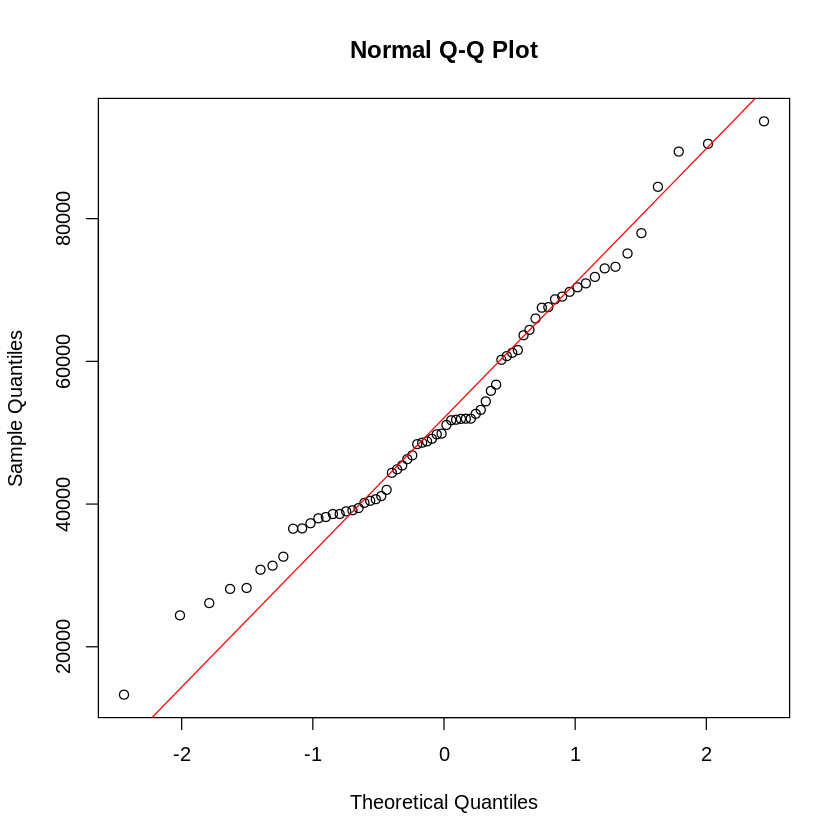

In [ ]:
qqnorm(df$stapWeek)
qqline(df$stapWeek, col = "red")



Wat zijn je eigen oberservaties over de Q-Q plot?

#### Shapiro Wilk
Een andere tool om de Q-Q plot en histogram meer kracht bij te staan is de Shapiro-Wilk test. Wat deze test doet is analytisch kijken of de data statistisch significant afwijkt van een normale verdeling. De toets formuleert de volgende hypothesen:
* H0: De data is normaal verdeeld
* H1: De data wijkt af van een normale verdeling

Wat hier dus uitkomt is een p-waarde. Zoals sommigen wellicht al weten, geeft de p-waarde aan wat de kans is om een afwijking te observeren die minstens zo groot is als in onze data, onder de aanname dat de data normaal verdeeld is.

Dat is een belangrijke kanttekening, want dat betekent niet dat we kunnen toetsen of H0 of H1 echt waar is, het enige wat wij toetsen is of er sterk bewijs aanwezig is dat de data afwijkt van een normale verdeling.

Als de p-waarde groter is dan 0.05, hebben we niet genoeg bewijs om H0 te verwerpen. Dat betekent *niet per se* dat de data normaal verdeeld is, maar dat we simpelweg onvoldoende bewijs hebben dat de data afwijkt van de normale verdeling.



In [ ]:
shapiro.test(df$stapWeek)


	Shapiro-Wilk normality test

data:  df$stapWeek
W = 0.97939, p-value = 0.3208


De uitkomst van de Shapiro-Wilk test zou ongeveer op p=0.32 uit moeten komen. Beantwoord nu de volgende vragen:
- Wat betekent dit nu precies?
- Tezamen met de Q-Q plot, is de data volgens jou normaal verdeeld?
- Welke toets is nu het meest passend voor ons?

## 3.4 Uitvoeren van de test
Op basis van je bovenstaande antwoord gaan we nu de toets uitvoeren en interpreteren. Hieruit zal weer een p-waarde komen die we moeten interpreteren.

In de statistieken gaan we altijd uit van een zogenaamde alpha-waarden of significantieniveau. In veel onderzoeken gaan we uit van een significantieniveau van α = 0.05. Dat betekent dat we accepteren dat we H0 met 5% kans ten onrechte verwerpen. Concreet:

- p ≤ α → we verwerpen H0
- p > α → we verwerpen H0 niet

Dus bij α = 0.05:

- p ≤ 0.05 → “statistisch significant”
- p > 0.05 → niet significant

Het is belangrijk deze altijd voor het uitvoeren van de toets vast te stellen, anders kan het lijken alsof we de α afstemmen op ons onderzoeksresultaat. Deze zet je dus vaak vast in je onderzoeksmethoden. We gaan in dit geval uit van α = 0.05.

In [ ]:
## t-test
t.test(stapWeek ~ Geslacht, data = df, alternative = "less")
## of wilcox
wilcox.test(stapWeek ~ Geslacht, data = df, alternative = "less")


	Welch Two Sample t-test

data:  stapWeek by Geslacht
t = 0.95798, df = 65.992, p-value = 0.8292
alternative hypothesis: true difference in means between group Man and group Vrouw is less than 0
95 percent confidence interval:
     -Inf 10726.04
sample estimates:
  mean in group Man mean in group Vrouw 
           54384.97            50472.42 



	Wilcoxon rank sum exact test

data:  stapWeek by Geslacht
W = 671, p-value = 0.8788
alternative hypothesis: true location shift is less than 0


# Resultaten interpreteren
We hebben nu de data volledig geanalyseerd en schoon gemaakt. Wat is nu uiteindelijk de conclusie? Zetten vrouwen gemiddeld meer stappen dan mannen of niet?